## Check GPU

In [1]:
! nvidia-smi

Mon Mar 22 02:21:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow 

In [5]:
tensorflow.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [6]:
from tensorflow import keras

## Train Model for MNIST

### Data Loading

In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
type(x_train)

numpy.ndarray

In [20]:
x_train.shape

(60000, 28, 28)

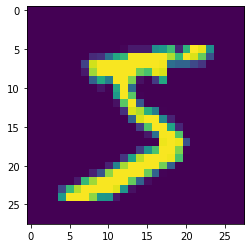

In [12]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])

In [13]:
y_train[0]

5

### Data Preprocessiong

- 1. Structural Data
- 2. No Missing Value
- 3. All data are numeric

In [14]:
x_train.shape

(60000, 28, 28)

In [24]:
# 28 * 28 = 784
x_train = x_train.reshape(60000, 28 * 28)
x_test = x_test.reshape(10000,  28 * 28)

In [25]:
x_train.shape

(60000, 784)

In [26]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

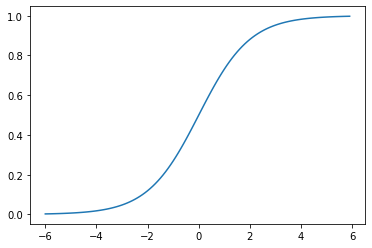

In [29]:
import numpy as np
def sigmoid_function(x):
  return 1/ (1 + np.exp(-x))

x = np.arange(-6,6,0.1)
from matplotlib import pyplot as plt
plt.plot(x, sigmoid_function(x))

In [30]:
sigmoid_function(np.array([0,100,128,200,255]))

array([0.5, 1. , 1. , 1. , 1. ])

In [31]:
sigmoid_function(np.array([0,100,128,200,255]) / 255 )

array([0.5       , 0.59680181, 0.62292001, 0.68660908, 0.73105858])

In [32]:
x_train /= 255
x_test  /= 255

In [33]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
from tensorflow.keras import utils
n_classes  = 10 
y_train = utils.to_categorical(y_train, n_classes)
y_test  = utils.to_categorical(y_test, n_classes)

In [35]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [37]:
def softmax_function(x):
  return np.exp(x) / np.sum(np.exp(x))

a = np.array([-3,2,3])
softmax_function(a)

array([0.00180884, 0.26845495, 0.72973621])

## Training Model

In [36]:
# 28 * 28 (784) -> 256 (relu) -> 256 (relu) -> 10 

n_input    = 784
n_hidden_1 = 256 
n_hidden_2 = 256 
n_classes  = 10 

training_epochs = 15
batch_size = 100

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Dense: x * w + b
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/15
600/600 [==============================] - 3s 2ms/step - loss: 1.5380 - accuracy: 0.5960 - val_loss: 0.4796 - val_accuracy: 0.8770
Epoch 2/15
600/600 [==============================] - 1s 2ms/step - loss: 0.4578 - accuracy: 0.8785 - val_loss: 0.3553 - val_accuracy: 0.9009
Epoch 3/15
600/600 [==============================] - 1s 2ms/step - loss: 0.3604 - accuracy: 0.8982 - val_loss: 0.3109 - val_accuracy: 0.9129
Epoch 4/15
600/600 [==============================] - 1s 2ms/step - loss: 0.3182 - accuracy: 0.9098 - val_loss: 0.2868 - val_accuracy: 0.9204
Epoch 5/15
600/600 [==============================] - 1s 2ms/step - loss: 0.2935 - accuracy: 0.9177 - val_loss: 0.2685 - val_accuracy: 0.9249
Epoch 6/15
600/600 [==============================] - 1s 2ms/step - loss: 0.2770 - accuracy: 0.9213 - val_loss: 0.2549 - val_accuracy: 0.9271
Epoch 7/15
600/600 [==============================] - 1s 2ms/step - loss: 0.2534 - accuracy: 0.9281 - val_loss: 0.2412 - val_accuracy: 0.9325
Epoch 

## Evaluate Model

In [41]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1721 - accuracy: 0.9491


[0.17209136486053467, 0.9491000175476074]

In [51]:
pred_y = model.predict(x_test)

In [53]:
# [5.4885993e-05, 3.4720802e-07, 1.0989317e-03, 5.4147108e-03,
#       5.3592873e-07, 5.8725869e-05, 7.4858217e-09, 9.9302614e-01,
#       3.0885385e-05, 3.1481890e-04] => 7

pred_y_ = np.argmax(pred_y, axis = 1)

In [59]:
y_test_ = np.argmax(y_test, axis = 1)

In [61]:
#y_test_

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test_, pred_y_)

0.9491

In [63]:
confusion_matrix(y_test_, pred_y_)

array([[ 959,    0,    1,    3,    0,    5,    6,    3,    2,    1],
       [   0, 1114,    3,    2,    1,    1,    3,    2,    9,    0],
       [   6,    2,  983,    8,    4,    1,    9,    7,    9,    3],
       [   0,    1,   10,  957,    0,   15,    2,   10,   12,    3],
       [   1,    1,    6,    1,  922,    0,   12,    4,    5,   30],
       [   6,    1,    1,   25,    2,  828,   14,    1,    9,    5],
       [   8,    3,    5,    1,    8,    8,  921,    1,    3,    0],
       [   2,    9,   21,    5,    3,    1,    0,  967,    1,   19],
       [   3,    2,    6,   19,    5,   16,   11,    6,  900,    6],
       [   9,    7,    1,   13,   15,    5,    1,   10,    8,  940]])

In [65]:
print(classification_report(y_test_, pred_y_))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.93      0.95      0.94      1010
           4       0.96      0.94      0.95       982
           5       0.94      0.93      0.93       892
           6       0.94      0.96      0.95       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.92      0.93       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



## Model Tuning

In [66]:
model = Sequential()

# Dense: x * w + b
# activation: sigmoid, relu, tan
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
# multi layer
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


## Optimizer

In [68]:
model = Sequential()

# Dense: x * w + b
# activation: sigmoid, relu, tan
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
# multi layer
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

# optimizer:sgd, adam, adagrad, mometum, nag... 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/15
600/600 [==============================] - 2s 2ms/step - loss: 0.4478 - accuracy: 0.8723 - val_loss: 0.1149 - val_accuracy: 0.9648
Epoch 2/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0998 - accuracy: 0.9692 - val_loss: 0.0805 - val_accuracy: 0.9735
Epoch 3/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0606 - accuracy: 0.9816 - val_loss: 0.0715 - val_accuracy: 0.9780
Epoch 4/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0401 - accuracy: 0.9869 - val_loss: 0.0762 - val_accuracy: 0.9767
Epoch 5/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0842 - val_accuracy: 0.9751
Epoch 6/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.0732 - val_accuracy: 0.9801
Epoch 7/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.0785 - val_accuracy: 0.9800
Epoch 

In [69]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0955 - accuracy: 0.9810


[0.09546371549367905, 0.9810000061988831]

## K-Fold Cross Validation

In [72]:
def buildClassifier(optimizer):
  model = Sequential()                               
  model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
  model.add(Dense(n_hidden_2, activation='relu'))
  model.add(Dense(n_classes, activation='softmax'))
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [75]:
from sklearn.model_selection import cross_val_score
import tensorflow as tf
classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = buildClassifier, 
                                                            batch_size = 100, 
                                                            epochs = 10, 
                                                            verbose = 0, 
                                                            optimizer = 'sgd')
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)

In [76]:
accuracies

array([0.93433332, 0.92825001, 0.93041664, 0.92825001, 0.93741667])

In [77]:
accuracies.mean()

0.9317333340644837

In [78]:
accuracies.std()

0.0036072423874772786

In [79]:
from sklearn.model_selection import cross_val_score
import tensorflow as tf
classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = buildClassifier, 
                                                            batch_size = 100, 
                                                            epochs = 10, 
                                                            verbose = 0, 
                                                            optimizer = 'adam')
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)

In [80]:
accuracies

array([0.97733331, 0.97683334, 0.97766668, 0.97375   , 0.97708333])

In [81]:
accuracies.std()

0.0014187242398853999

## Dropout

In [83]:
from tensorflow.keras.layers import Dropout
model = Sequential()

model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dropout(rate=0.1))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(n_classes, activation='softmax'))

# optimizer:sgd, adam, adagrad, mometum, nag... 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/15
600/600 [==============================] - 2s 2ms/step - loss: 0.4867 - accuracy: 0.8553 - val_loss: 0.1159 - val_accuracy: 0.9651
Epoch 2/15
600/600 [==============================] - 1s 2ms/step - loss: 0.1101 - accuracy: 0.9676 - val_loss: 0.0939 - val_accuracy: 0.9714
Epoch 3/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9784 - val_loss: 0.0795 - val_accuracy: 0.9748
Epoch 4/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0550 - accuracy: 0.9829 - val_loss: 0.0729 - val_accuracy: 0.9784
Epoch 5/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0404 - accuracy: 0.9870 - val_loss: 0.0665 - val_accuracy: 0.9800
Epoch 6/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0679 - val_accuracy: 0.9789
Epoch 7/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0307 - accuracy: 0.9902 - val_loss: 0.0841 - val_accuracy: 0.9759
Epoch 

## Grid Search v.s. Randomized Search 

In [84]:
def buildClassifier(optimizer):
  model = Sequential()                               
  model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
  model.add(Dense(n_hidden_2, activation='relu'))
  model.add(Dense(n_classes, activation='softmax'))
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [88]:
x_train.shape

(60000, 784)

In [90]:
y_train.shape

(60000, 10)

In [91]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(
    build_fn = buildClassifier, 
    epochs = 10,verbose = 0)

parameters = {'batch_size': [300, 600],
              'optimizer': ['adam', 'rmsprop' ,'sgd']}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           cv = 2)

grid_search     = grid_search.fit(x_train, y_train)


In [92]:
best_parameters = grid_search.best_params_
best_accuracy   = grid_search.best_score_

In [93]:
best_parameters

{'batch_size': 300, 'optimizer': 'adam'}

In [94]:
best_accuracy

0.9711833298206329